In [1]:
import matplotlib.pyplot as plt
import numpy as np

import lsst.daf.butler as dB
import lsst.cp.verify.notebooks.utils as utils
import lsst.afw.display as afwDisplay

In [2]:
# Which calibration type to analyse.
calibType = 'ptc'

# This cell should be edited to match the data to be inspected.
afwDisplay.setDefaultBackend("astrowidgets")
cameraName = 'LATISS'
genCollection = 'u/czw/DM-28920/ptcGen.20210721a'
genCollection2 = 'u/czw/DM-28920/ptcGen.20210721b'

/home/czw/.local/lib/python3.8/site-packages/ginga/cmap.py:13317: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  for name in _cm.cmap_d:


In [3]:
# Get butler and camera
butler = dB.Butler("/repo/main/", collections=[genCollection, genCollection2])
camera = butler.get('camera', instrument=cameraName)

In [4]:
ptcA = butler.get('ptc', instrument='LATISS', detector=0, collection=genCollection)
ptcB = butler.get('ptc', instrument='LATISS', detector=0, collection=genCollection2)

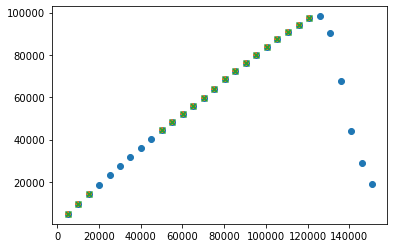

C00 Continue? [c, q]c


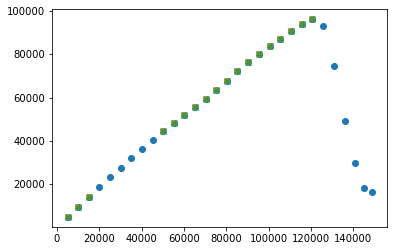

C01 Continue? [c, q]c


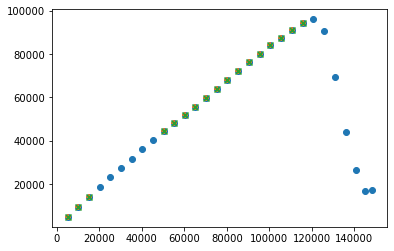

C02 Continue? [c, q]c


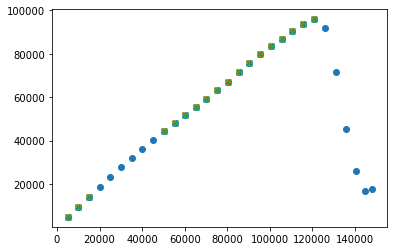

C03 Continue? [c, q]c


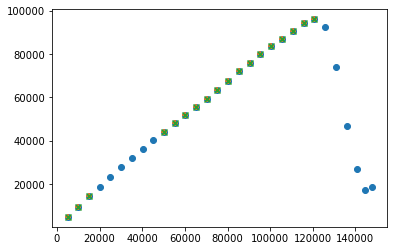

C04 Continue? [c, q]c


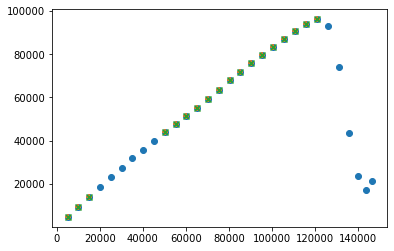

C05 Continue? [c, q]c


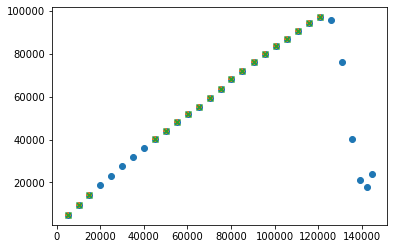

C06 Continue? [c, q]c


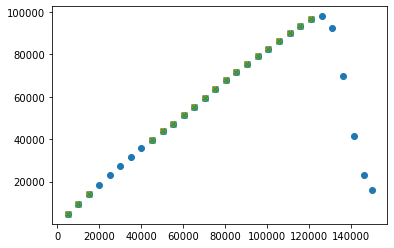

C07 Continue? [c, q]c


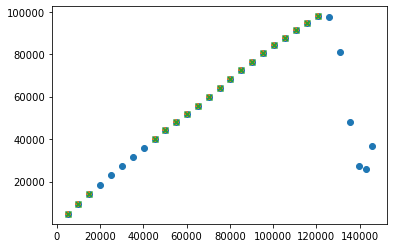

C10 Continue? [c, q]c


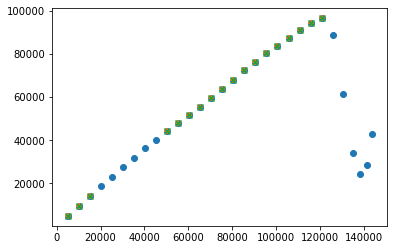

C11 Continue? [c, q]c


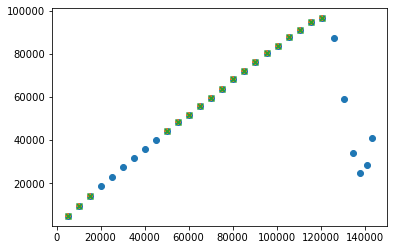

C12 Continue? [c, q]c


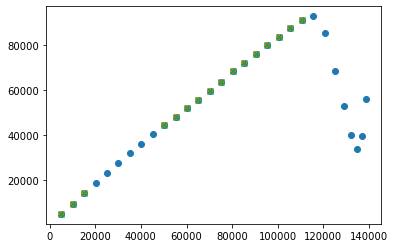

C13 Continue? [c, q]c


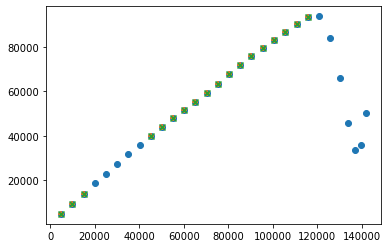

C14 Continue? [c, q]c


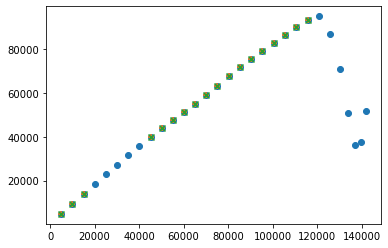

C15 Continue? [c, q]c


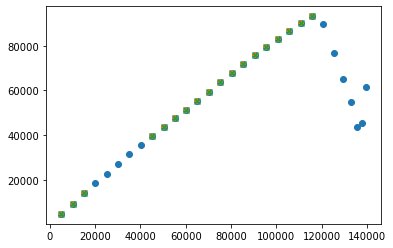

C16 Continue? [c, q]c


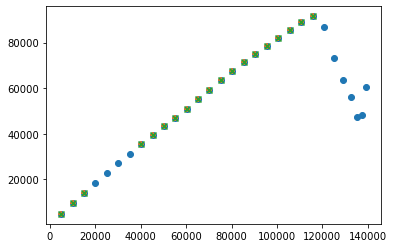

C17 Continue? [c, q]c


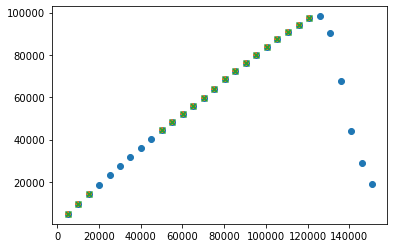

C00 Continue? [c, q]c


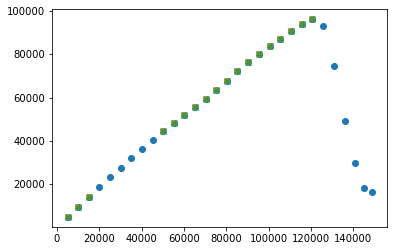

C01 Continue? [c, q]c


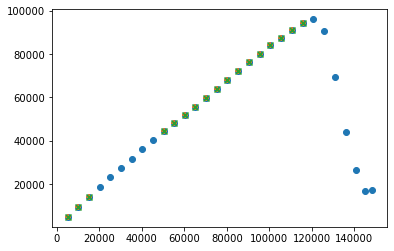

C02 Continue? [c, q]c


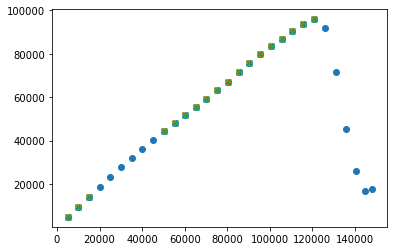

C03 Continue? [c, q]c


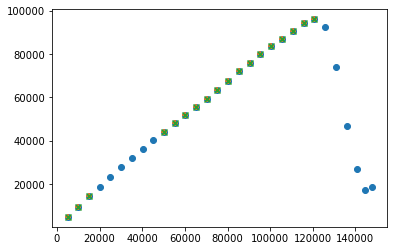

C04 Continue? [c, q]c


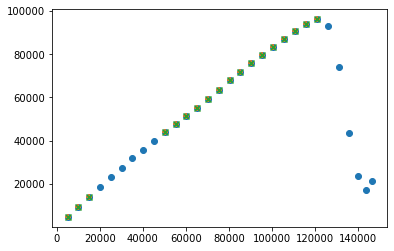

C05 Continue? [c, q]c


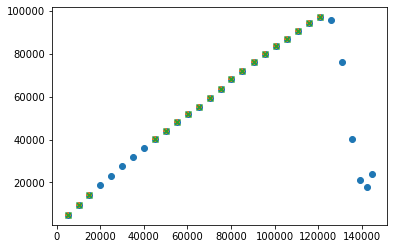

C06 Continue? [c, q]c


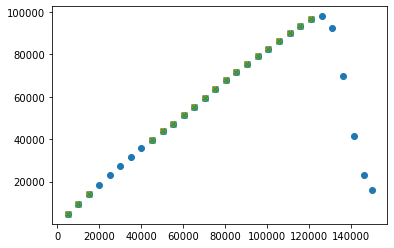

C07 Continue? [c, q]c


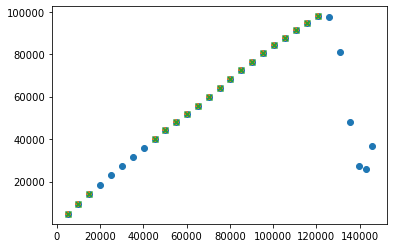

C10 Continue? [c, q]c


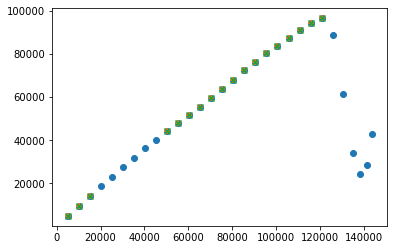

C11 Continue? [c, q]c


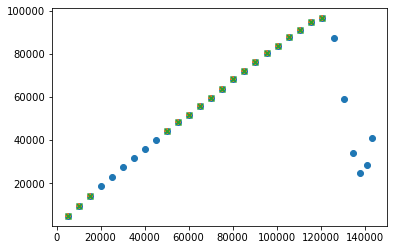

C12 Continue? [c, q]c


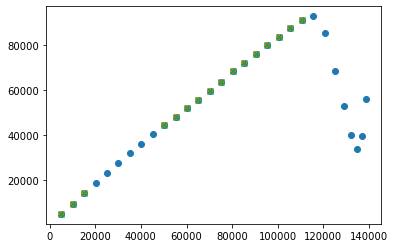

C13 Continue? [c, q]c


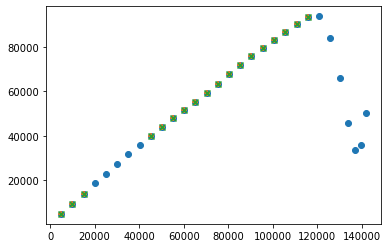

C14 Continue? [c, q]c


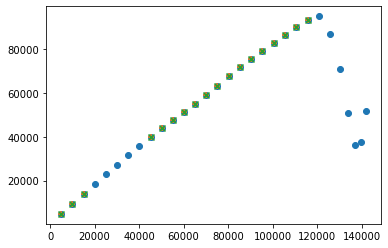

C15 Continue? [c, q]c


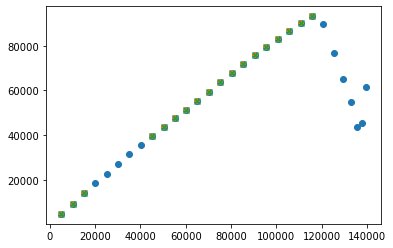

C16 Continue? [c, q]c


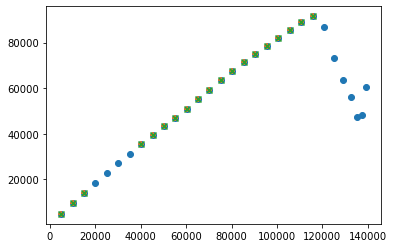

C17 Continue? [c, q]c


In [5]:
continueDisplay=True
for amp in ptcA.ampNames:
    plt.scatter(ptcA.rawMeans[amp], ptcA.rawVars[amp], marker='o', label="PTCA")

    plt.scatter(ptcA.finalMeans[amp], ptcA.finalVars[amp], marker='+', label="PTCA")
    plt.scatter(ptcB.finalMeans[amp], ptcB.finalVars[amp], marker='x', label='PTCB')
    plt.show()
    
    while True:
        ans = input(f"{amp} Continue? [c, q]").lower()
        if ans in ("", "c",):
            break
        if ans in ('q', 'x'):
            continueDisplay = False
            break
    if continueDisplay is False:
        break

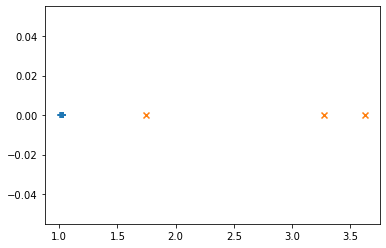

A Gain: ['1.016', '1.017', '1.028', '1.019', '1.008', '1.026', '1.025', '1.028', '1.021', '1.019', '1.021', '1.034', '1.029', '1.026', '1.030', '1.029']
A RN:   ['nan', 'nan', '3.621', 'nan', 'nan', '3.270', '1.743', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']
B Gain: ['1.016', '1.017', '1.028', '1.019', '1.008', '1.026', '1.025', '1.028', '1.021', '1.019', '1.021', '1.034', '1.029', '1.026', '1.030', '1.029']
B RN:   ['nan', 'nan', '3.621', 'nan', 'nan', '3.270', '1.743', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [6]:
plt.scatter(np.array(list(ptcA.gain.values())), 
            np.array(list(ptcA.gain.values())) - np.array(list(ptcB.gain.values())), 
            marker='+', label="PTCA")
plt.scatter(np.array(list(ptcA.noise.values())), 
            np.array(list(ptcA.noise.values())) - np.array(list(ptcB.noise.values())),
            marker='x', label='PTCB')
plt.show()
print("A Gain:", [f"{x:.3f}" for x in ptcA.gain.values()])
print("A RN:  ", [f"{x:.3f}" for x in ptcA.noise.values()])

print("B Gain:", [f"{x:.3f}" for x in ptcB.gain.values()])
print("B RN:  ", [f"{x:.3f}" for x in ptcB.noise.values()])

In [7]:
print(ptcA.badAmps)
print(ptcB.badAmps)

['nan']
['nan']


In [1]:
ptcA.inputExpIdPairs

NameError: name 'ptcA' is not defined

In [2]:
ptcB.inputExpIdPairs

NameError: name 'ptcB' is not defined